# Membership Function

In [529]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [530]:
Penghasilan = {
    'high'      : [ 15.92, 17.02, 18.03, 19.70],
    'average'   : [ 9.47, 12.17, 14.00, 16.32],
    'low'     : [ 4.62, 5.78, 7.03, 10.02],
}

Pengeluaran = {
    'bottom'    : [ 3.44, 5.16, 6.35, 7.53],
    'middle'    : [ 7.30, 8.06, 9.00, 9.52],
    'upper'     : [ 8.60, 9.46, 10.11, 11.30],
}

# Plot Membership Function

In [531]:
def plot_linguistik(titik, warna, label = '', min=0, max=1):
    y = [0, 1, 1, 0]
    # plt.plot((x1,x2), (y1,y2), warna)
    plt.plot( (min, titik[0]), (0, 0), warna )
    for i in range(len(titik)-1):
        plt.plot( (titik[i], titik[i+1]), (y[i], y[i+1]), warna )
    plt.plot( (titik[3], max), (0,0), warna, label=label )

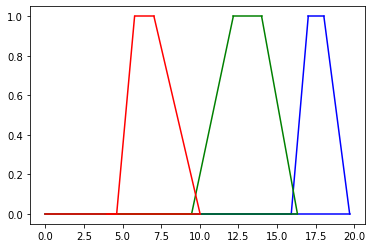

In [532]:
plot_linguistik(Penghasilan['high'], 'b-', max=4)
plot_linguistik(Penghasilan['average'], 'g-', max=4)
plot_linguistik(Penghasilan['low'], 'r-', max=4)

In [533]:
def plot_membership( membership, min = 0, max = 1 ):
    warna = [ 'r', 'g', 'b', 'c', 'm', 'y', 'k' ]
    i = 0
    for ling in membership :
        plot_linguistik(membership[ling], warna[i], ling, min=min, max=max)
        i += 1
    plt.legend(loc=3)
    plt.show()

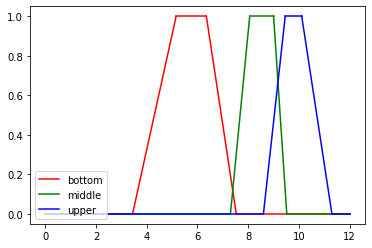

In [534]:
plot_membership(Pengeluaran, max=12)

# Fuzzyfikasi

In [535]:
def fuzzy_linguistik(x, titik):
    if x < titik[0] or x > titik[3]:
        return 0
    elif x >= titik[1] and x <= titik[2]:
        return 1
    elif x >= titik[0] and x < titik[1]:
        return (x-titik[0])/(titik[1]-titik[0])
    elif x >= titik[2] and x < titik[3]:
        return (titik[3]-x)/(titik[3]-titik[2])
    return 0

In [536]:
def fuzzy_membership(x, membership ):
    hasil = {}
    for ling in membership :
        hasil[ling] = fuzzy_linguistik(x, membership[ling])
    return hasil

In [537]:
def fuzzyfikasi(x, list_membership):
    hasil = []
    for i in range(len(list_membership)):
        hasil.append( fuzzy_membership(x[i], list_membership[i]) )
    return hasil

In [538]:
m1 = [13.11, 10.32]
m2 = [5.78, 6.66]
m1_fuzzy = fuzzyfikasi(m1, [Penghasilan, Pengeluaran])
m2_fuzzy = fuzzyfikasi(m2, [Penghasilan, Pengeluaran])
print(m1_fuzzy)

[{'high': 0, 'average': 1, 'low': 0}, {'bottom': 0, 'middle': 0, 'upper': 0.8235294117647054}]


In [539]:
print(Penghasilan)
fuzzy_membership( 10.00, Penghasilan)

{'high': [15.92, 17.02, 18.03, 19.7], 'average': [9.47, 12.17, 14.0, 16.32], 'low': [4.62, 5.78, 7.03, 10.02]}


{'average': 0.1962962962962961, 'high': 0, 'low': 0.0066889632107022}

# Inferensi

In [540]:
rule = {
    ( 'high', 'upper' )     : 'reject',
    ( 'high', 'middle' )    : 'reject',
    ( 'high', 'bottom' )    : 'reject',
    ( 'average', 'upper' )  : 'accept',
    ( 'average', 'middle' ) : 'consider',
    ( 'average', 'bottom' ) : 'consider',
    ( 'low', 'upper' )      : 'accept',
    ( 'low', 'middle' )     : 'consider',
    ( 'low', 'bottom' )     : 'consider',
}

In [541]:
def inferensi(x_fuzzy, rule):
    hasil = {}
    for l1, v1 in x_fuzzy[0].items():
        for l2, v2 in x_fuzzy[1].items():
            r = (l1, l2)
            min_value = min(v1, v2)
            current_value = hasil.get( rule[r], 0)
            hasil[ rule[r] ] = max(min_value, current_value)
    return hasil

In [542]:
m1_infer = inferensi(m1_fuzzy, rule)
m2_infer = inferensi(m2_fuzzy, rule)
print(m1_infer)
print(m2_infer)

{'reject': 0, 'consider': 0, 'accept': 0.8235294117647054}
{'reject': 0, 'consider': 0.73728813559322, 'accept': 0}


# Defuzzyfikasi Sugeno

In [543]:
def defuzz_sugeno( x_infer, membership ):
    z_muB, muB = 0, 0
    for ling in membership :
        z_muB = z_muB + x_infer[ling]*membership[ling]
        muB = muB + x_infer[ling]
    return z_muB/muB

In [544]:
accept_sugeno = { 'accept':100, 'consider':50, 'reject':25}

# Contoh Kasus

In [545]:
import pandas as pd
data_Mahasiswa = pd.read_excel('Mahasiswa.xls')
data_Mahasiswa.head()

,Id,Penghasilan,Pengeluaran
0,1,18.76,9.68
1,2,8.35,4.52
2,3,17.03,10.11
3,4,8.23,9.25
4,5,16.89,6.99


In [546]:
data_Mahasiswa.describe()

,Id,Penghasilan,Pengeluaran
count,100.000000,100.000000,100.00000
mean,50.500000,13.778900,8.38130
std,29.011492,4.055465,1.89298
min,1.000000,4.620000,3.44000
25%,25.750000,9.617500,7.39250
50%,50.500000,14.805000,8.60000
75%,75.250000,17.045000,9.80750
max,100.000000,19.690000,11.29000


In [547]:
scale_Mahasiswa = data_Mahasiswa.copy()
scale_Mahasiswa = data_Mahasiswa[['Penghasilan', 'Pengeluaran']]

In [548]:
scale_Mahasiswa.head()

,Penghasilan,Pengeluaran
0,18.76,9.68
1,8.35,4.52
2,17.03,10.11
3,8.23,9.25
4,16.89,6.99


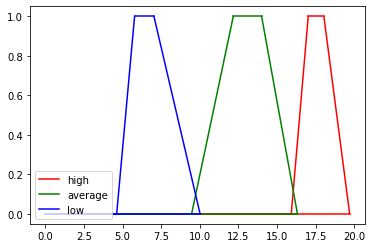

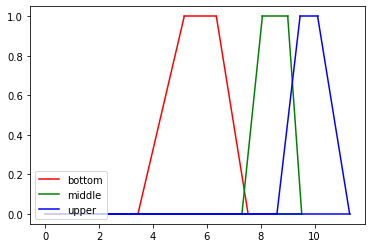

In [549]:
Penghasilan = {
    'high'      : [ 15.92, 17.02, 18.03, 19.70],
    'average'   : [ 9.47, 12.17, 14.00, 16.32],
    'low'     : [ 4.62, 5.78, 7.03, 10.02],
}

Pengeluaran = {
    'bottom'    : [ 3.44, 5.16, 6.35, 7.53],
    'middle'    : [ 7.30, 8.06, 9.00, 9.52],
    'upper'     : [ 8.60, 9.46, 10.11, 11.30],
}

diterima = {'accept' : 100, 'consider' : 50, 'reject' : 25}

plot_membership(Penghasilan)
plot_membership(Pengeluaran)

In [550]:
rule = {
    ( 'high', 'upper' )     : 'reject',
    ( 'high', 'middle' )    : 'reject',
    ( 'high', 'bottom' )    : 'reject',
    ( 'average', 'upper' )  : 'accept',
    ( 'average', 'middle' ) : 'consider',
    ( 'average', 'bottom' ) : 'consider',
    ( 'low', 'upper' )      : 'accept',
    ( 'low', 'middle' )     : 'accept',
    ( 'low', 'bottom' )     : 'consider',
}

In [551]:
data = scale_Mahasiswa.values
skor = []
for x in data :
    x_fuzzy = fuzzyfikasi(x, [Penghasilan, Pengeluaran])
    x_infer = inferensi(x_fuzzy, rule)
    x_defuz = defuzz_sugeno(x_infer, diterima)
    skor.append(x_defuz)
print(skor)

[25.0, 50.0, 25.0, 100.0, 25.0, 50.0, 100.0, 25.0, 25.0, 25.0, 50.0, 50.0, 50.0, 60.18518518518519, 25.0, 100.0, 25.0, 100.0, 50.0, 24.999999999999996, 100.0, 25.0, 50.0, 25.0, 100.0, 94.82758620689664, 25.0, 25.000000000000004, 25.0, 25.000000000000004, 25.0, 25.0, 100.0, 25.0, 25.0, 50.0, 94.82758620689664, 100.0, 49.99999999999999, 25.0, nan, 100.0, 100.0, 25.0, 25.0, 100.0, 100.0, 50.00000000000001, 99.99999999999999, 100.0, 50.0, 100.0, 50.00000000000001, 28.41191066997524, 28.569883167460105, 79.63872325499824, 25.0, 25.0, 50.0, 50.0, 50.0, 100.0, 100.0, 24.999999999999996, 100.0, 100.0, 50.0, 65.18076230983151, 100.0, 25.0, 50.0, 50.0, 50.0, 50.0, 100.0, 50.0, 25.0, 46.349139739823826, 100.0, 50.0, 100.0, 25.0, 25.0, 50.0, 50.0, 50.0, 25.0, 35.390428211587015, 50.0, 25.0, 50.00000000000001, 25.0, 50.0, 100.0, 25.0, 25.0, 25.0, 100.0, 100.0, nan]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [552]:
data_Mahasiswa["skor"]=skor
t=data_Mahasiswa.sort_values(by="skor")
n=t.nlargest(20, 'skor')
df = pd.DataFrame(n.sort_values(by='Id'), columns = ['Id'])
cols = [1]
print(df)
df.to_excel('Bantuan.xls')

    Id
3    4
6    7
15  16
17  18
20  21
24  25
32  33
37  38
41  42
45  46
46  47
49  50
51  52
61  62
68  69
74  75
78  79
80  81
93  94
97  98


In [553]:
n.sort_values(by='Id')

,Id,Penghasilan,Pengeluaran,skor
3,4,8.23,9.25,100.0
6,7,9.03,9.35,100.0
15,16,12.39,9.78,100.0
17,18,15.57,9.68,100.0
20,21,15.29,9.89,100.0
24,25,6.48,7.85,100.0
32,33,7.03,10.11,100.0
37,38,9.94,10.82,100.0
41,42,14.06,10.43,100.0
45,46,9.58,10.04,100.0
